In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px


In [6]:
df = pd.read_csv('../data/cleaned/generic_butcher_cleaned.csv')

In [3]:
df.head()


,product_name,date_time,measured_weight,measured_height
0,13 oz Ribeye Tail A,2024-06-03 07:16:28,16.76,1.62952
1,13 oz Ribeye Tail A,2024-06-03 07:16:47,16.12,1.02086
2,16 oz Ribeye Tail A,2024-06-03 07:17:36,16.34,1.03975
3,16 oz Ribeye Tail A,2024-06-03 07:17:53,16.16,1.05378
4,16 oz Ribeye Tail A,2024-06-03 07:18:08,16.12,1.03522


In [4]:
bot_bin = np.floor(df['measured_weight'][0])
top_bin = np.ceil(df['measured_weight'][0])

In [5]:
bins = np.arange(bot_bin, top_bin, .25)

In [6]:
len(bins)

4

In [7]:
for x in bins:
    print(x)

16.0
16.25
16.5
16.75


In [8]:
bins = list(map(lambda x: float(x), bins))

In [9]:
bins

[16.0, 16.25, 16.5, 16.75]

In [10]:
# df['binned_values'] = pd.cut(df['measured_weight'], bins=bins, labels=False)

In [7]:
unique_prods = list(df.groupby('product_name')[['measured_weight']].value_counts().reset_index()['product_name'].unique())

In [8]:
unique_prods

['10 oz  Sirloin A',
 '11 oz  Sirloin B',
 '11 oz  Sirloin C',
 '13 oz  Ribeye Tail A',
 '16 oz  Dry Age Ribeye A',
 '16 oz  Prime Strip A',
 '16 oz  Ribeye Tail A',
 '16 oz  Strip A',
 '18 oz  Ribeye A',
 '20 oz  Prime Ribeye A',
 '22 oz  Porterhouse A',
 '3.5 oz Tender Bits A',
 '4 oz T Tenderloin Tail A',
 '5 oz S Sirloin A',
 '5 oz S Sirloin B',
 '6 oz S Sirloin A',
 '6 oz S Sirloin B',
 '6 oz T Tenderloin A',
 '7 oz S Sirloin A',
 '7 oz S Sirloin B',
 '7 oz T Tenderloin A',
 '8 oz P Pork Chop A',
 '8 oz S Sirloin A',
 '8 oz S Sirloin B',
 '8 oz T Tenderloin A',
 '9 oz S Sirloin A',
 '9 oz T Tenderloin A']

In [21]:
df.groupby('product_name')[['measured_weight']].value_counts().reset_index()

,product_name,measured_weight,count
0,10 oz Sirloin A,10.00,41
1,10 oz Sirloin A,9.64,31
2,10 oz Sirloin A,9.84,28
3,10 oz Sirloin A,9.54,28
4,10 oz Sirloin A,10.10,24
...,...,...,...
2603,9 oz T Tenderloin A,9.11,1
2604,9 oz T Tenderloin A,9.21,1
2605,9 oz T Tenderloin A,8.22,1
2606,9 oz T Tenderloin A,8.20,1


In [22]:
prod_df = df.loc[df['product_name'] == unique_prods[0]]

In [60]:
bot_bin = np.floor(prod_df['measured_weight'].min())
top_bin = np.ceil(prod_df['measured_weight'].max())

In [61]:
bot_bin

9.0

In [62]:
top_bin 

11.0

In [72]:
bins = np.arange(bot_bin, top_bin + .25, .25)

In [73]:
bins = list(map(lambda x: float(x), bins))

In [74]:
bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0]

In [75]:
prod_df.loc[:, 'bins'] = pd.cut(prod_df['measured_weight'], bins=bins, labels=False)

In [86]:
bin_counts = prod_df['bins'].value_counts().sort_index().values

In [87]:
bin_counts

array([ 22,  76, 213, 271, 109,   1,   1,   2], dtype=int64)

In [78]:
bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0]

In [70]:
unique_prods[0]

'10 oz  Sirloin A'

In [88]:
x_bins = bins[:-1]
x_bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75]

c:\Users\saad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

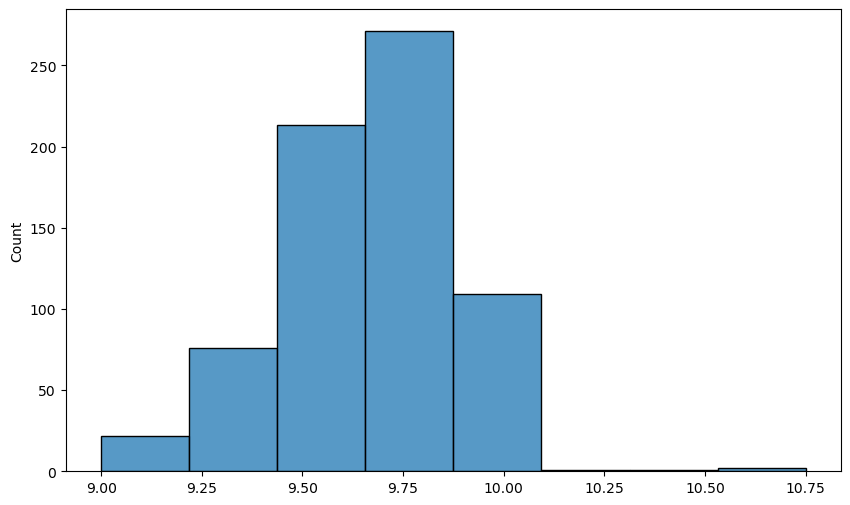

In [91]:
plt.figure(figsize=(10,6))
seaborn.histplot(x=x_bins, weights=bin_counts, bins=len(x_bins))


In [19]:
grouped_df = df.groupby('product_name')['measured_weight'].value_counts().reset_index()
grouped_df.loc[grouped_df['product_name'] == unique_prods[0]]['count'].sum()

695

In [3]:
df2 = pd.read_csv('../data/cleaned/generic_butcher_spec_cleaned.csv')

In [9]:
current_prod = df2.loc[df2['product_name'] == unique_prods[0]]
current_prod

,product_name,weight_min,weight_max,height_min,height_max
0,10 oz Sirloin A,9.12,10.12,1.1,1.75


In [12]:
product_A = df.loc[df['product_name'] == unique_prods[0]]
product_A

,product_name,date_time,measured_weight,measured_height
5036,10 oz Sirloin A,2024-06-05 21:05:07,9.74,1.47718
5037,10 oz Sirloin A,2024-06-05 21:05:13,9.82,1.33462
5038,10 oz Sirloin A,2024-06-05 21:05:18,9.48,1.70458
5039,10 oz Sirloin A,2024-06-05 21:05:24,9.70,1.30403
5040,10 oz Sirloin A,2024-06-05 21:05:30,9.72,1.52521
...,...,...,...,...
32676,10 oz Sirloin A,2024-06-27 19:20:56,9.20,1.30005
32677,10 oz Sirloin A,2024-06-27 19:24:29,9.24,1.53207
32678,10 oz Sirloin A,2024-06-27 19:24:35,9.26,1.34580
32679,10 oz Sirloin A,2024-06-27 19:24:50,9.18,1.44220


In [70]:
product_A.loc[product_A['measured_weight'] > 50, 'measured_weight'] *= 0.01
product_A.measured_weight.max()

11.0

In [20]:
min_goal = current_prod['weight_min'].values[0]
max_goal = current_prod['weight_max'].values[0]
avg_goal = round(product_A['measured_weight'].mean(), 3)
min_goal, avg_goal, max_goal


(9.12, 9.765, 10.12)

In [34]:
bin_min = np.floor(product_A['measured_weight'].min())
bin_max = np.ceil(product_A['measured_weight'].max())
# bin_count = int((bin_max-bin_min)/(.25))
bin_size = .25
bin_min, bin_max, bin_size

(9.0, 11.0, 0.25)

In [55]:
fig = px.histogram(product_A, x='measured_weight')
fig.add_vline(x=min_goal, line_dash='solid', line_color='red')
fig.add_vline(x=max_goal, line_dash='solid', line_color='red')
fig.add_vline(x=avg_goal, line_dash='longdash', line_color='blue')

fig.update_layout(
    width=800,
    height=600,
    title='Histogram of Measured Weight with Goals',
    xaxis_title='Measured Weight',
    yaxis_title='Count',
)

fig.update_traces(marker=dict(color='teal', line=dict(width=1, color='DarkSlateGrey')))

fig.update_traces(xbins=dict(
    start=bin_min,
    end=bin_max,
    size=bin_size
))
fig.show()
